In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Generate single molecule spectra for model training

In [2]:
k = np.arange(900, 1800, 5)

In [3]:
a=[]

for i in range(1000):
    a.append( norm.pdf( k, loc=1000+(np.random.rand()-0.5)*50, scale=10+(np.random.rand()-0.5)*2 )*(1+(np.random.rand()-0.5)*2*1) ) 

A = pd.DataFrame(np.column_stack((k, *a)))

In [4]:
b=[]

for i in range(1000):
    b.append( norm.pdf( k, loc=1400+(np.random.rand()-0.5)*50, scale=10+(np.random.rand()-0.5)*2 )*(2+(np.random.rand()-0.5)*2*2) ) 

B = pd.DataFrame(np.column_stack((k, *b)))

In [5]:
c=[]

for i in range(1000):
    c.append( norm.pdf( k, loc=1700+(np.random.rand()-0.5)*50, scale=10+(np.random.rand()-0.5)*2 )*(3+(np.random.rand()-0.5)*2*3) ) 

C = pd.DataFrame(np.column_stack((k, *c)))

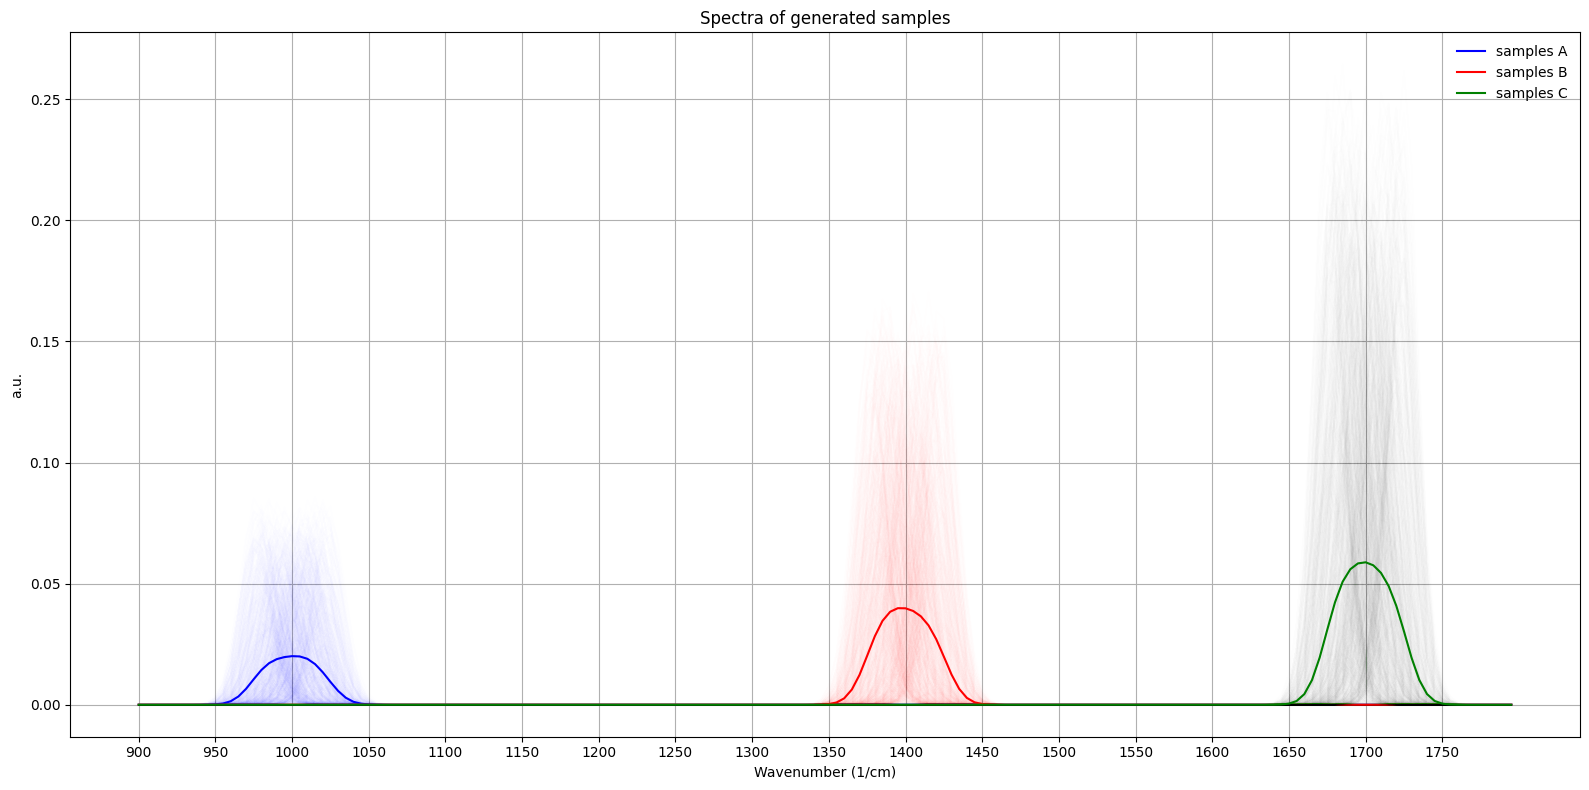

In [6]:
fig, ax = plt.subplots(figsize=[16, 8])


sample_measurement = []
A_plot = pd.melt(A, [0])
for sample, measurement in A_plot.groupby('variable'):
    sample_measurement.append(measurement.reset_index()["value"])
    measurement.reset_index()["value"].plot(alpha=0.005, ax=ax, label="_no_legend_", color="blue")
    plt.xticks(ticks=np.arange(0, 180, 10), labels=np.arange(900, 1800, 50))

pd.concat(sample_measurement, axis=1).mean(axis=1).plot(
    ax=ax, color="blue", label="samples A", legend=True
)
###
sample_measurement = []
B_plot = pd.melt(B, [0])
for sample, measurement in B_plot.groupby('variable'):
    sample_measurement.append(measurement.reset_index()["value"])
    measurement.reset_index()["value"].plot(alpha=0.005, ax=ax, label="_no_legend_", color="red")
    plt.xticks(ticks=np.arange(0, 180, 10), labels=np.arange(900, 1800, 50))

pd.concat(sample_measurement, axis=1).mean(axis=1).plot(
    ax=ax, color="red", label="samples B", legend=True
)
###
sample_measurement = []
C_plot = pd.melt(C, [0])
for sample, measurement in C_plot.groupby('variable'):
    sample_measurement.append(measurement.reset_index()["value"])
    measurement.reset_index()["value"].plot(alpha=0.005, ax=ax, label="_no_legend_", color="green")
    plt.xticks(ticks=np.arange(0, 180, 10), labels=np.arange(900, 1800, 50))

pd.concat(sample_measurement, axis=1).mean(axis=1).plot(
    ax=ax, color="green", label="samples C", legend=True
)

ax.grid()

ax.set_ylabel("a.u.")
ax.set_title("Spectra of generated samples")
ax.set_xlabel("Wavenumber (1/cm)")
ax.legend(loc="upper right", frameon=False)

plt.tight_layout()

In [7]:
A = A.set_index([0])
A.index.names = ['Wavenumbers']
A.columns = ['A_'+str(col) for col in A.columns]

B = B.set_index([0])
B.index.names = ['Wavenumbers']
B.columns = ['B_'+str(col) for col in B.columns]

C = C.set_index([0])
C.index.names = ['Wavenumbers']
C.columns = ['C_'+str(col) for col in C.columns]

df0 = pd.concat([A,B,C], axis=1)

In [8]:
df0

,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,...,C_991,C_992,C_993,C_994,C_995,C_996,C_997,C_998,C_999,C_1000
Wavenumbers,,,,,,,,,,,,,,,,,,,,,
900.0,1.507536e-34,3.650481e-24,6.845261e-23,2.329212e-35,4.611695e-23,1.297638e-15,1.160664e-31,4.536432e-19,3.057141e-19,1.021954e-17,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
905.0,1.050881e-31,6.011194e-22,5.210028e-21,9.598388e-33,4.113069e-21,6.036949e-14,3.844647e-29,4.764129e-17,1.893617e-17,7.554495e-16,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
910.0,5.420938e-29,7.564972e-20,3.221819e-19,3.092626e-30,2.949337e-19,2.187654e-12,9.840533e-27,3.739248e-15,9.359096e-16,4.257329e-14,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
915.0,2.069332e-26,7.275950e-18,1.618726e-17,7.791052e-28,1.700341e-17,6.174997e-11,1.946224e-24,2.193393e-13,3.690970e-14,1.829056e-12,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
920.0,5.845490e-24,5.348205e-16,6.607796e-16,1.534633e-25,7.881349e-16,1.357663e-09,2.974262e-22,9.615686e-12,1.161481e-12,5.990658e-11,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.522196e-16,1.259916e-13,6.877204e-15,1.780148e-16,7.264346e-15,2.239786e-12,6.997582e-09,1.990206e-19,3.158053e-13,3.863011e-07
1780.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.328538e-18,3.188345e-15,1.397674e-16,2.580265e-18,1.172505e-16,3.991692e-14,4.144335e-10,2.766270e-21,7.435097e-15,2.501991e-08
1785.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,8.564122e-21,6.436516e-17,2.246143e-18,2.929931e-20,1.427590e-18,5.233563e-16,1.974643e-11,3.103419e-23,1.355342e-16,1.249097e-09


Generate mixed molecule spectra for testing the model

In [9]:
F=[]
abc=[]

for i in range(1000):
    Fa=(1+(np.random.rand()-0.5)*2*1)
    Fb=(2+(np.random.rand()-0.5)*2*2)
    Fc=(3+(np.random.rand()-0.5)*2*3)

    

    abc.append( norm.pdf( k, loc=1000+(np.random.rand()-0.5)*50, scale=10+(np.random.rand()-0.5)*2 )*Fa + \
                norm.pdf( k, loc=1400+(np.random.rand()-0.5)*50, scale=10+(np.random.rand()-0.5)*2 )*Fb + \
                norm.pdf( k, loc=1700+(np.random.rand()-0.5)*50, scale=10+(np.random.rand()-0.5)*2 )*Fc)

    F.append([Fa/1.,Fb/2.,Fc/3.])
    
    

In [10]:
ABC = pd.DataFrame(np.column_stack((k, *abc))).set_index([0])
ABC.index.names = ['Wavenumbers']
ABC.columns = ['ABC_'+str(col) for col in ABC.columns]

In [11]:
ABC

,ABC_1,ABC_2,ABC_3,ABC_4,ABC_5,ABC_6,ABC_7,ABC_8,ABC_9,ABC_10,...,ABC_991,ABC_992,ABC_993,ABC_994,ABC_995,ABC_996,ABC_997,ABC_998,ABC_999,ABC_1000
Wavenumbers,,,,,,,,,,,,,,,,,,,,,
900.0,3.594948e-40,2.144559e-22,3.530999e-30,2.577919e-13,3.513959e-26,1.344997e-14,9.058348e-35,5.640055e-29,6.323233e-34,7.481535e-29,...,1.427975e-29,2.282091e-18,5.127998e-23,6.765723e-20,1.624842e-18,4.401376e-27,4.552707e-32,1.561810e-23,5.864214e-24,1.611481e-21
905.0,3.384199e-37,1.580135e-20,8.793183e-28,6.206468e-12,4.287837e-24,4.919431e-13,5.683294e-32,1.126063e-26,3.605040e-31,1.802067e-26,...,5.473623e-27,1.826596e-16,8.766451e-21,6.653355e-18,9.437296e-17,8.589356e-25,1.644490e-29,1.329843e-21,5.551928e-22,1.262090e-19
910.0,2.408407e-34,9.332830e-19,1.715748e-25,1.211755e-10,4.208514e-22,1.414362e-11,2.671839e-29,1.771582e-24,1.545532e-28,3.349930e-24,...,1.562987e-24,1.109114e-14,1.124606e-18,5.001408e-16,4.326275e-15,1.304054e-22,4.564799e-27,8.944422e-20,4.183529e-20,7.886736e-18
915.0,1.295730e-31,4.418708e-17,2.623129e-23,1.918580e-09,3.322525e-20,3.196384e-10,9.411954e-27,2.196234e-22,4.982449e-26,4.806012e-22,...,3.324777e-22,5.108982e-13,1.082623e-16,2.873882e-14,1.565347e-13,1.540257e-20,9.737351e-25,4.752079e-18,2.509034e-18,3.932300e-16
920.0,5.269992e-29,1.677028e-15,3.142279e-21,2.463428e-08,2.109874e-18,5.678183e-09,2.484325e-24,2.145434e-20,1.207827e-23,5.321307e-20,...,5.268610e-20,1.785322e-11,7.820862e-15,1.262323e-12,4.470308e-12,1.415318e-18,1.596205e-22,1.994319e-16,1.197665e-16,1.564365e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775.0,1.838669e-16,1.095417e-08,7.654270e-14,3.773014e-17,1.223741e-10,7.347068e-07,3.463342e-11,8.147268e-12,6.872257e-10,2.186496e-14,...,4.986413e-20,2.766566e-07,4.633961e-16,3.496886e-13,3.029498e-21,1.403053e-09,1.411666e-07,2.642463e-11,3.340483e-10,1.889911e-08
1780.0,2.046021e-18,7.420393e-10,2.048185e-15,3.647254e-19,2.802177e-12,5.669471e-08,8.845805e-13,3.199159e-13,1.900351e-11,3.760675e-16,...,4.906129e-22,2.323499e-08,8.204669e-18,6.843286e-15,2.525000e-23,6.721616e-11,1.118213e-08,1.020101e-12,1.395080e-11,1.231832e-09
1785.0,1.722166e-20,4.051083e-11,4.379622e-17,2.653111e-21,4.717766e-14,3.440111e-09,1.712825e-14,1.016659e-14,3.873225e-13,4.973949e-18,...,3.802269e-24,1.570654e-09,1.156770e-19,1.002276e-16,1.656715e-25,2.564886e-12,7.038766e-10,3.155396e-14,4.612320e-13,6.360052e-11


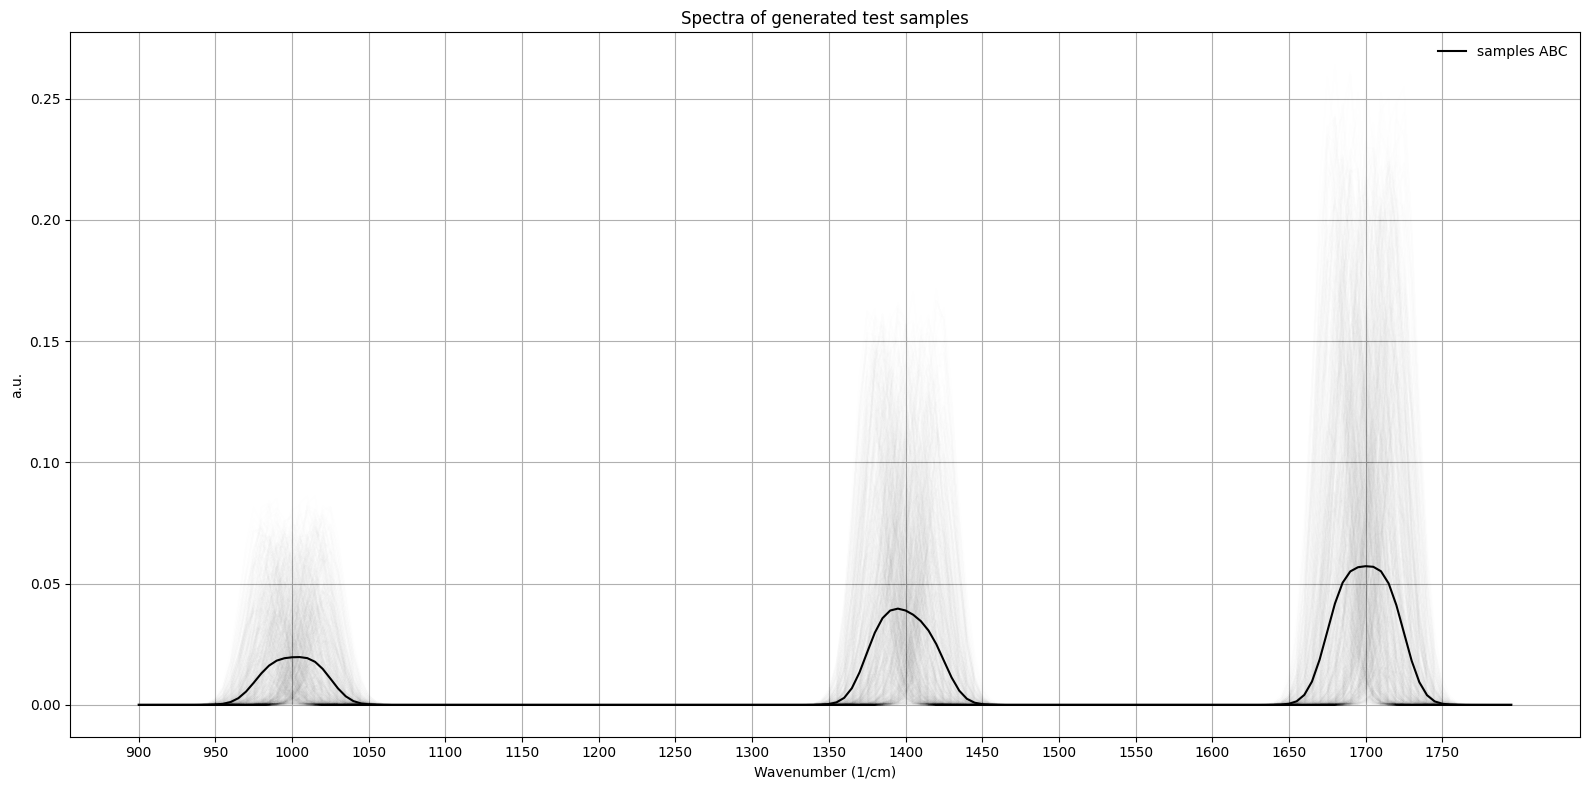

In [15]:
fig, ax = plt.subplots(figsize=[16, 8])


sample_measurement = []
ABC_plot = pd.melt(ABC.reset_index(), ['Wavenumbers'])
for sample, measurement in ABC_plot.groupby('variable'):
    sample_measurement.append(measurement.reset_index()["value"])
    measurement.reset_index()["value"].plot(alpha=0.005, ax=ax, label="_no_legend_", color="black")
    plt.xticks(ticks=np.arange(0, 180, 10), labels=np.arange(900, 1800, 50))

pd.concat(sample_measurement, axis=1).mean(axis=1).plot(
    ax=ax, color="black", label="samples ABC", legend=True
)

ax.grid()

ax.set_ylabel("a.u.")
ax.set_title("Spectra of generated test samples")
ax.set_xlabel("Wavenumber (1/cm)")
ax.legend(loc="upper right", frameon=False)

plt.tight_layout()

In [16]:
df1=ABC.copy()

In [17]:
labels = pd.DataFrame(F).rename(columns={0:'A', 1:'B', 2:'C'})
labels.index = ['ABC_'+str(row+1) for row in labels.index]
labels

,A,B,C
ABC_1,0.672512,0.297167,0.871459
ABC_2,0.071994,0.750334,0.518251
ABC_3,1.835126,0.780922,0.562359
ABC_4,1.091200,0.056516,0.820338
ABC_5,1.123355,0.937824,1.706693
...,...,...,...
ABC_996,1.801727,0.233831,1.795040
ABC_997,0.870401,1.981955,0.422678
ABC_998,0.005900,1.234353,1.136485
ABC_999,0.076813,0.531656,1.435257


Now we have:

+ the single molecule spectra `df0` 
+ the mixed molecule spectra `df1`
+ `labels` with the mixing ratios of the mixed molecule spectra



Next step: Find a ML model that determines the right molecular mixing ratios from the mixed molecule spectra. 